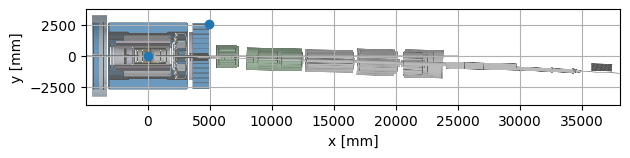

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# --- INPUTS --------------------------------------------------------------
image_path = "eic_center_forward.png"  # <- replace with your file

# Two correspondence points:
#   (x_mm, y_mm)  <->  (x_pixel, y_pixel)
p0_x_mm, p0_y_mm = (0.0, 0.0)
p0_x_pixel, p0_y_pixel = (371.0, 281.0)

p1_x_mm, p1_y_mm = (4937.0, 2622.0)
p1_x_pixel, p1_y_pixel = (739.0, 85.0)
# -----------------------------------------------------------------------

# Linear mapping: x_mm = x_scale * x_pixel + x_offset (same for y)
x_scale = (p1_x_mm - p0_x_mm) / (p1_x_pixel - p0_x_pixel)
x_offset = p0_x_mm - x_scale * p0_x_pixel

y_scale = (p1_y_mm - p0_y_mm) / (p1_y_pixel - p0_y_pixel)
y_offset = p0_y_mm - y_scale * p0_y_pixel  # note: y_scale will often be negative

def pixel_to_mm_x(x_pixel: float) -> float:
    return x_scale * x_pixel + x_offset

def pixel_to_mm_y(y_pixel: float) -> float:
    return y_scale * y_pixel + y_offset

# Load image
image = mpimg.imread(image_path)
height_pixel, width_pixel = image.shape[:2]

# Image extent in millimeters (left, right, bottom, top)
left_mm = pixel_to_mm_x(0)
right_mm = pixel_to_mm_x(width_pixel)
top_mm = pixel_to_mm_y(0)            # origin='upper' => row 0 is the top
bottom_mm = pixel_to_mm_y(height_pixel)

# Plot
fig, ax = plt.subplots()
ax.imshow(
    image,
    extent=[left_mm, right_mm, bottom_mm, top_mm],
    origin="upper",
    interpolation="nearest",
)

# Optional: overlay the reference points to verify alignment
ax.plot([p0_x_mm, p1_x_mm], [p0_y_mm, p1_y_mm], marker="o", linestyle="none")

ax.set_xlabel("x [mm]")
ax.set_ylabel("y [mm]")
ax.set_aspect("equal", adjustable="box")
ax.grid(True)

# Uncomment to lock the view to the image bounds:
# ax.set_xlim(min(left_mm, right_mm), max(left_mm, right_mm))
# ax.set_ylim(min(bottom_mm, top_mm), max(bottom_mm, top_mm))

plt.tight_layout()
plt.show()
